In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [11]:
data = pd.DataFrame(np.zeros((8,7)))
data.columns = ['Dataset', 'Model', 'POD', 'FAR', 'CSI', 'BIAS', 'SR']

data['Dataset'] = ['1', '2', '3', '4', '5', '6', '7', '8']
data['Model'] = ['MLP D1', 'RF D1', 'MLP D2', 'RF D2', 'MLP D3', 'RF D4', 'MLP D5', 'RF D6']
data['POD'] = [0.828, 0.828, 0.770, 0.730, 0.891, 0.812, 0.776, 0.717]
data['FAR'] = [0.293, 0.145, 0.287, 0.240, 0.260, 0.188, 0.302, 0.221]
data['CSI'] = [0.616, 0.726, 0.588, 0.594, 0.679, 0.684, 0.581, 0.596]
data['BIAS'] = [1.172, 0.969, 1.079, 0.961, 1.203, 1.000, 1.112, 0.921]
data['SR'] = [0.707, 0.855, 0.713, 0.760, 0.740, 0.812, 0.698, 0.779]

print(data)

  Dataset   Model    POD    FAR    CSI   BIAS     SR
0       1  MLP D1  0.828  0.293  0.616  1.172  0.707
1       2   RF D1  0.828  0.145  0.726  0.969  0.855
2       3  MLP D2  0.770  0.287  0.588  1.079  0.713
3       4   RF D2  0.730  0.240  0.594  0.961  0.760
4       5  MLP D3  0.891  0.260  0.679  1.203  0.740
5       6   RF D4  0.812  0.188  0.684  1.000  0.812
6       7  MLP D5  0.776  0.302  0.581  1.112  0.698
7       8   RF D6  0.717  0.221  0.596  0.921  0.779


In [12]:
def csi_from_far_pod(far,pod): #CSI = 1/(1/(1-FAR) + (1/POD) - 1)
    CSI = 1/(1/(1-far) + (1/pod) - 1)
    return CSI

far_range,pod_range=np.meshgrid(np.arange(0.0001,1.005,.005),np.arange(0.0001,1.005,.005))
csi_range=csi_from_far_pod(far_range,pod_range)

thetas = [.5,1,1.5,2,4] # Cinco valores de ângulo entre 0 e 90 graus

In [13]:
data['POD']

,POD
0,0.828
1,0.828
2,0.770
3,0.730
4,0.891
5,0.812
6,0.776
7,0.717


In [14]:
data.loc[:,'CSI']

,CSI
0,0.616
1,0.726
2,0.588
3,0.594
4,0.679
5,0.684
6,0.581
7,0.596


In [15]:
# Set the font sizes
plt.rc('font', size=10)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)

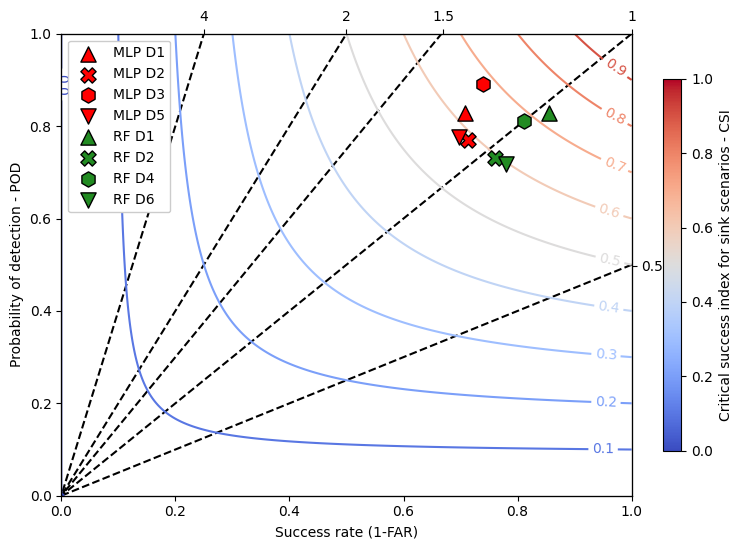

In [16]:
fig,ax=plt.subplots(figsize=(8,6))
cf=ax.contour(1-far_range,pod_range,csi_range,levels=np.arange(0,1.1,.1),cmap='coolwarm',zorder=2)
cf.clabel(fmt='%1.1f')

ax.scatter(data.loc[0,'SR'],data.loc[0, 'POD'],c='r',marker='^',edgecolor='black',label='MLP D1',s=120,zorder=100)
ax.scatter(data.loc[2,'SR'],data.loc[2, 'POD'],c='r',marker='X', edgecolor='black',label='MLP D2',s=120,zorder=100)
ax.scatter(data.loc[4,'SR'],data.loc[4, 'POD'],c='r',marker='h', edgecolor='black',label='MLP D3',s=120,zorder=100)
ax.scatter(data.loc[6,'SR'],data.loc[6, 'POD'],c='r',marker='v',edgecolor='black',label='MLP D5',s=120,zorder=100)

ax.scatter(data.loc[1,'SR'],data.loc[1, 'POD'],c='forestgreen',marker='^',edgecolor='black',label='RF D1',s=120,zorder=100)
ax.scatter(data.loc[3,'SR'],data.loc[3, 'POD'],c='forestgreen',marker='X', edgecolor='black',label='RF D2',s=120,zorder=100)
ax.scatter(data.loc[5,'SR'],data.loc[5, 'POD'],c='forestgreen',marker='h', edgecolor='black',label='RF D4',s=120,zorder=100)
ax.scatter(data.loc[7,'SR'],data.loc[7, 'POD'],c='forestgreen',marker='v',edgecolor='black',label='RF D6',s=120,zorder=100)

far_range_first = (1-far_range)[0]  # Extract the first element
ay2=ax.twinx()
ay2.set_yticks([0.4975],labels=['0.5'])
ax2=ax.twiny()
ax2.set_xticks([1,.67,.5,.25],labels=[1,1.5,2,4])
for m in thetas:
    y=m*(1-far_range)[0]
    ax.plot((1-far_range)[0],y,'--',c='k',zorder=1) #plot bias

#norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Normalize CSI range
sm = mpl.cm.ScalarMappable(cmap='coolwarm')
sm.set_array([])  # Necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Critical success index for sink scenarios - CSI', fraction=0.03, pad=0.05)  # Add color bar to the figure

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('Probability of detection - POD')
ax.set_xlabel('Success rate (1-FAR)')
legend = ax.legend(frameon=True,loc=2)  # zorder para a legenda
legend.get_frame().set_alpha(1)  # Caixa da legenda sem transparência

plt.savefig('/content/drive/MyDrive/Paper_figs/performance_diagram_sink.png',dpi=400,bbox_inches='tight')

In [17]:
data = pd.DataFrame(np.zeros((8,7)))
data.columns = ['Dataset', 'Model', 'POD', 'FAR', 'CSI', 'BIAS', 'SR']

data['Dataset'] = ['1', '2', '3', '4', '5', '6', '7', '8']
data['Model'] = ['MLP D1', 'RF D1', 'MLP D2', 'RF D2', 'MLP D3', 'RF D4', 'MLP D5', 'RF D6']
data['POD'] = [0.703,	0.878,	0.742,	0.808,	0.730,	0.838,	0.720,	0.830]
data['FAR'] = [0.175,	0.145,	0.206,	0.218,	0.115,	0.162,	0.206,	0.222]
data['CSI'] = [0.612,	0.765,	0.622,	0.659,	0.667,	0.721,	0.606,	0.671]
data['BIAS'] = [0.851,	1.027,	0.934,	1.033,	0.824,	1.000,	0.907,	1.066]
data['SR'] = [0.825,	0.855,	0.794,	0.782,	0.885,	0.838,	0.794,	0.778]

print(data)

  Dataset   Model    POD    FAR    CSI   BIAS     SR
0       1  MLP D1  0.703  0.175  0.612  0.851  0.825
1       2   RF D1  0.878  0.145  0.765  1.027  0.855
2       3  MLP D2  0.742  0.206  0.622  0.934  0.794
3       4   RF D2  0.808  0.218  0.659  1.033  0.782
4       5  MLP D3  0.730  0.115  0.667  0.824  0.885
5       6   RF D4  0.838  0.162  0.721  1.000  0.838
6       7  MLP D5  0.720  0.206  0.606  0.907  0.794
7       8   RF D6  0.830  0.222  0.671  1.066  0.778


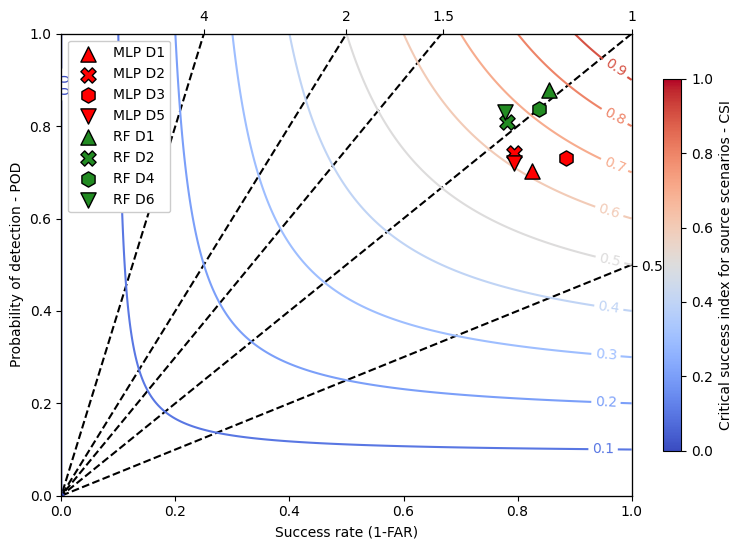

In [18]:
fig,ax=plt.subplots(figsize=(8,6))
cf=ax.contour(1-far_range,pod_range,csi_range,levels=np.arange(0,1.1,.1),cmap='coolwarm',zorder=2)
cf.clabel(fmt='%1.1f')

ax.scatter(data.loc[0,'SR'],data.loc[0, 'POD'],c='r',marker='^',edgecolor='black',label='MLP D1',s=120,zorder=100)
ax.scatter(data.loc[2,'SR'],data.loc[2, 'POD'],c='r',marker='X', edgecolor='black',label='MLP D2',s=120,zorder=100)
ax.scatter(data.loc[4,'SR'],data.loc[4, 'POD'],c='r',marker='h', edgecolor='black',label='MLP D3',s=120,zorder=100)
ax.scatter(data.loc[6,'SR'],data.loc[6, 'POD'],c='r',marker='v',edgecolor='black',label='MLP D5',s=120,zorder=100)

ax.scatter(data.loc[1,'SR'],data.loc[1, 'POD'],c='forestgreen',marker='^',edgecolor='black',label='RF D1',s=120,zorder=100)
ax.scatter(data.loc[3,'SR'],data.loc[3, 'POD'],c='forestgreen',marker='X', edgecolor='black',label='RF D2',s=120,zorder=100)
ax.scatter(data.loc[5,'SR'],data.loc[5, 'POD'],c='forestgreen',marker='h', edgecolor='black',label='RF D4',s=120,zorder=100)
ax.scatter(data.loc[7,'SR'],data.loc[7, 'POD'],c='forestgreen',marker='v',edgecolor='black',label='RF D6',s=120,zorder=100)

far_range_first = (1-far_range)[0]  # Extract the first element
ay2=ax.twinx()
ay2.set_yticks([0.4975],labels=['0.5'])
ax2=ax.twiny()
ax2.set_xticks([1,.67,.5,.25],labels=[1,1.5,2,4])
for m in thetas:
    y=m*(1-far_range)[0]
    ax.plot((1-far_range)[0],y,'--',c='k',zorder=1) #plot bias

#norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Normalize CSI range
sm = mpl.cm.ScalarMappable(cmap='coolwarm')
sm.set_array([])  # Necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label='Critical success index for source scenarios - CSI', fraction=0.03, pad=0.05)  # Add color bar to the figure

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('Probability of detection - POD')
ax.set_xlabel('Success rate (1-FAR)')
legend = ax.legend(frameon=True,loc=2)  # zorder para a legenda
legend.get_frame().set_alpha(1)  # Caixa da legenda sem transparência

plt.savefig('/content/drive/MyDrive/Paper_figs/performance_diagram_source.png',dpi=400,bbox_inches='tight')